In [160]:
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [145]:
x, y = make_classification(n_features=2,n_redundant=0,n_informative=2, n_clusters_per_class=1,random_state=42)
x += 1.2 * np.random.uniform(size = x.shape)
xy = (x, y)

In [146]:
#x.shape

In [147]:
#plt.scatter(x[:, 0],x[:, 1],c=y)

In [148]:
#x, y = make_moons(noise=0.2,random_state=42)

In [149]:
#plt.scatter(x[:, 0],x[:, 1],c=y)

In [150]:
#x, y = make_circles(noise=0.1,factor=0.3,random_state=42)

In [151]:
#plt.scatter(x[:, 0],x[:, 1],c=y)

In [152]:
datasets = [xy,
            make_moons(noise=0.2,random_state=42),
            make_circles(noise=0.1,factor=0.3,random_state=42)]

In [153]:
fig = plt.figure(figsize=(6,9))
i = 1

<Figure size 600x900 with 0 Axes>

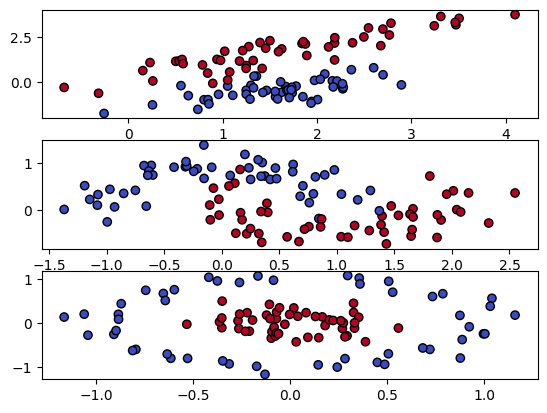

In [154]:
for ds_cnt, ds in enumerate(datasets):
    x, y = ds
    if ds_cnt == 0:
        colors = "darkred"
    elif ds_cnt == 1:
        colors = "darkblue"
    else:
        colors = "darkgreen"
    ax = plt.subplot(len(datasets),1,i)
    ax.scatter(x[:, 0],x[:, 1],c = y,cmap = plt.cm.coolwarm,edgecolors="black")
    i+=1

In [155]:
plt.show()

In [142]:
names = ["Nearest Neightbors", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]

In [156]:
classifiers = [KNeighborsClassifier(),
               SVC(),
               DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB()]

In [162]:
fig = plt.figure(figsize=(6,9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    x, y = ds
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    ax = plt.subplot(len(datasets),len(classifiers) + 1,i)
    if ds_cnt == 0:
        ax.set_title("Input Data")

    # plot training data
    ax.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cm_bright,edgecolors= "black")

_IncompleteInputError: incomplete input (2458613777.py, line 8)